## Preliminary comparison of mass balance for 4 oil types
This notebook reviews mass balance results over 8 days for two spill dates:
- June 05, 2015
- Jan. 15, 2017

The first eight graphics show mass balance for the two dates and four oil types.  I then explore volume and density changes over time, including some comments/questions in the header text. 

In [1]:
import sys
sys.path.insert(1, '/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path

from midoss_utils import *

In [2]:
# set figure fontsizes
fs=12 
mpl.rc('xtick', labelsize=fs)
mpl.rc('ytick', labelsize=fs)
mpl.rc('legend', fontsize=fs)
mpl.rc('axes', titlesize=fs+4)
mpl.rc('axes', labelsize=fs)
mpl.rc('figure', titlesize=fs)
mpl.rc('font', size=fs)
%matplotlib inline

In [3]:
color_dict = {"MEvaporated": "darkolivegreen",
              "MDispersed": "darkblue", 
              "MDissolved": "royalblue", 
              "MBio": "skyblue",
              "MFloating": "saddlebrown", 
             "MBeached": "chocolate", 
             "MInitial": "grey",
             "MTotal":"magenta"}

cols_plot = ["MEvaporated", "MDispersed",  "MDissolved", "MBio", "MFloating", "MBeached", "MInitial","MTotal"]
oil_types = ["dilbit", "akns", "diesel","bunkerc"]

## June 05, 2015 spill date (mass blance comparision)

Note: 
- No dispersion for AKNS and bunker-c.  This seems wrong to me.

In [4]:
results_path = Path('/Users/rmueller/Projects/MIDOSS/results/EightCases_forHaibo/05jun2015/')
akns_sro = results_path/'resOilOutput_akns.sro'
bunker_sro = results_path/'resOilOutput_bunkerc.sro'
diesel_sro = results_path/'resOilOutput_diesel.sro'
dilbit_sro = results_path/'resOilOutput_dilbit.sro'

fname = {}
results = {}
for oil in oil_types:
    fname[oil] = results_path/f'resOilOutput_{oil}.sro'
    results[oil] = load_sro(fname[oil],['MEvaporated', 'MDispersed', 'MDissolved','MBio','MassOil','VolOilBeached','Density','VWaterContent','MWaterContent'])
    results[oil] = results[oil].rename(columns={"MassOil":"MFloating"})
    # calculate mass of beached oil (this step will eventually be inherent to the "load_sro" script)
    results[oil]['MBeached'] = [row['VolOilBeached']*row['Density']/(1-row['VWaterContent'])*(1-row['MWaterContent']) for day, row in results[oil].iterrows()]
    # net mass of weathered oil
    results[oil]['MTotal'] = [row['MEvaporated']+row['MDispersed']+row['MDissolved']+row['MBio']+row['MFloating']+row['MBeached'] for day, row in results[oil].iterrows()]
    #results[oil] = results[oil].drop(['VolOilBeached','Density'], axis=1)
    # Initial spill mass
    spill_volume = 10000 #m3
    initial_density = results[oil]['Density'][0] #kg/m3
    results[oil]['MInitial'] = [spill_volume * initial_density for i in range(len(results[oil].Density))]

/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/midoss_utils.py:37: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pandas.datetime(numpy.int(YY), numpy.int(MM), numpy.int(DD),
/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/midoss_utils.py:65: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pandas.datetime(numpy.int(YY), numpy.int(MM), numpy.int(DD),


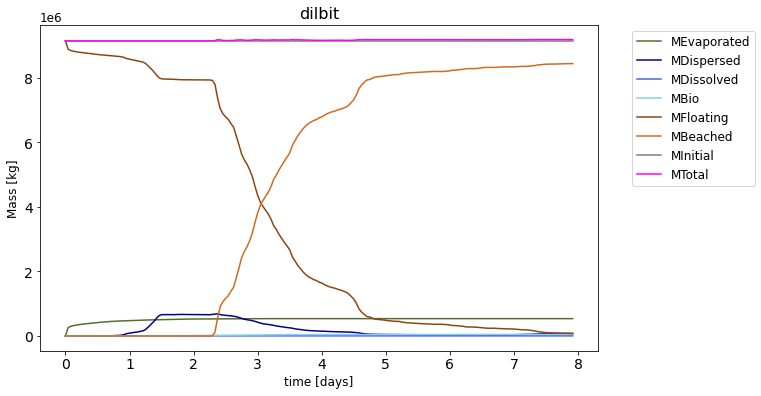

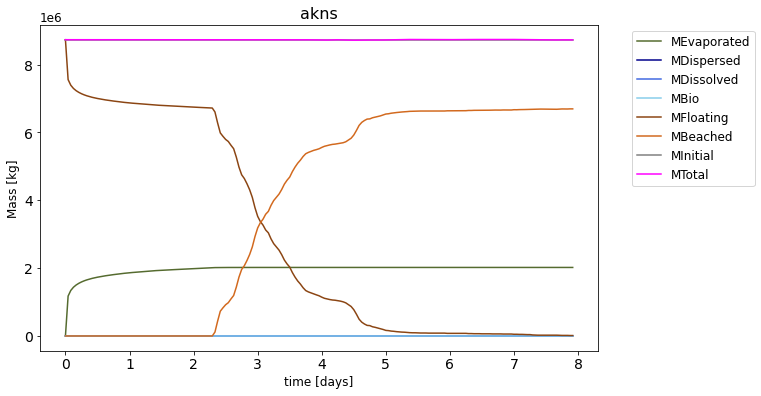

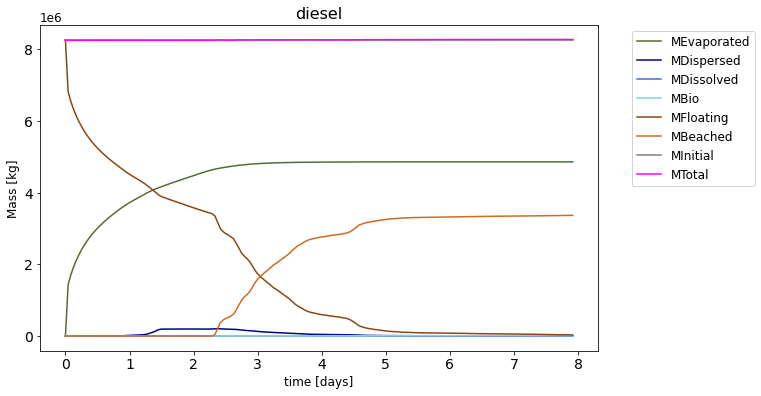

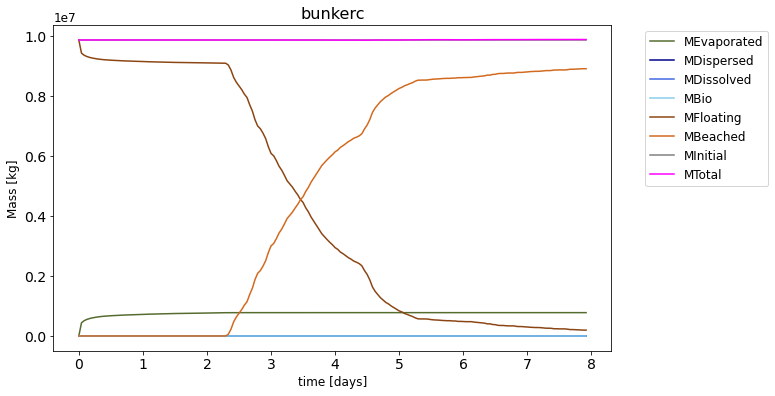

In [5]:
for oil in oil_types:
    ax = results[oil][cols_plot].plot(
        linewidth=1.5,
        color = [color_dict.get(column_name,'#333333') for column_name in cols_plot],
        figsize = (10,6),
        fontsize = 14
    )
    ax.set_ylabel('Mass [kg]')
    ax.set_xlabel('time [days]')
    ax.set_title(f'{oil}')
    ax.legend(bbox_to_anchor=(1.05, 1))

## January 15, 2018 spill date (mass balance comparison) 

Note: 
- No dispersion for AKNS and diesel.  This seems wrong to me.  

/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/midoss_utils.py:37: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pandas.datetime(numpy.int(YY), numpy.int(MM), numpy.int(DD),
/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/midoss_utils.py:65: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pandas.datetime(numpy.int(YY), numpy.int(MM), numpy.int(DD),


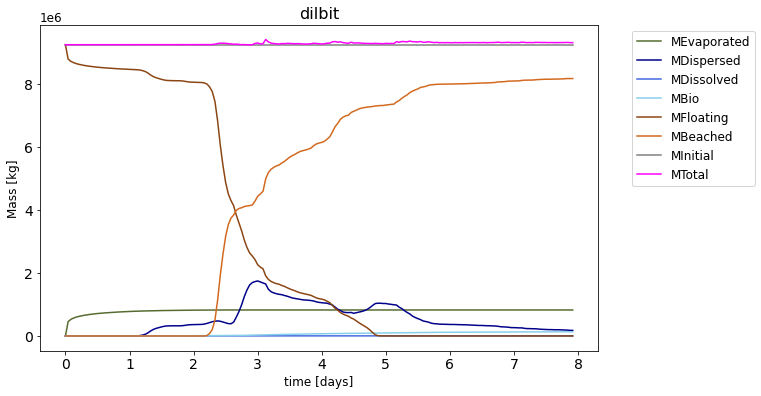

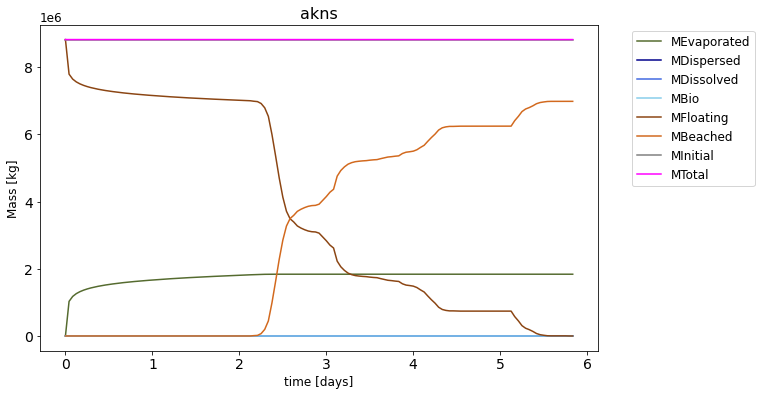

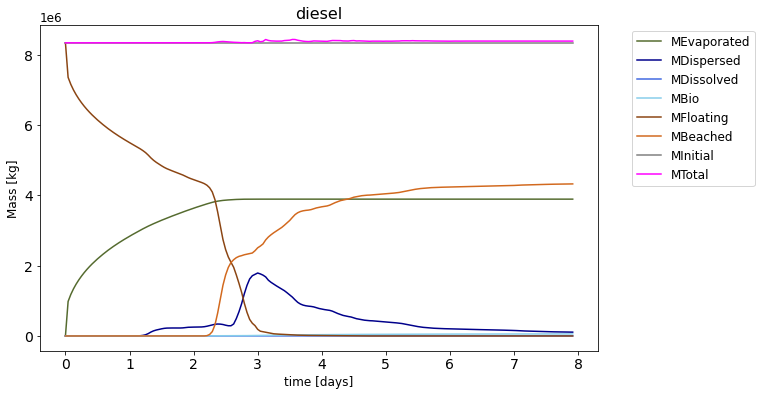

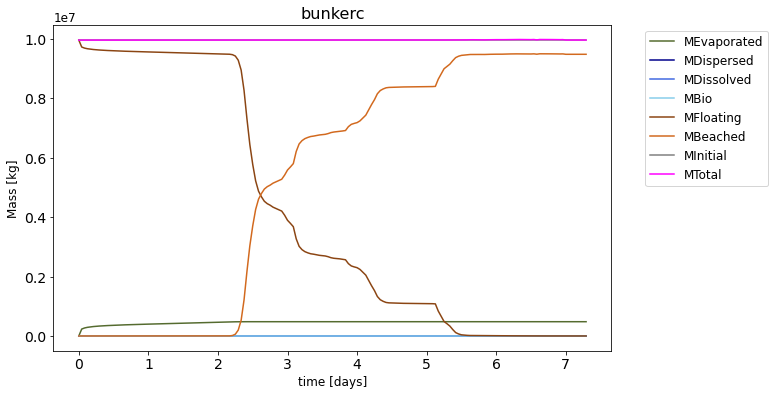

In [6]:
results_path = Path('/Users/rmueller/Projects/MIDOSS/results/EightCases_forHaibo/15jan2018/')
akns_sro = results_path/'resOilOutput_akns.sro'
bunker_sro = results_path/'resOilOutput_bunkerc.sro'
diesel_sro = results_path/'resOilOutput_diesel.sro'
dilbit_sro = results_path/'resOilOutput_dilbit.sro'

fname = {}
results = {}
for oil in oil_types:
    fname[oil] = results_path/f'resOilOutput_{oil}.sro'
    results[oil] = load_sro(fname[oil],['MEvaporated', 'MDispersed', 'MDissolved','MBio','MassOil','VolOilBeached','Density','VWaterContent','MWaterContent'])
    results[oil] = results[oil].rename(columns={"MassOil":"MFloating"})
    # calculate mass of beached oil (this step will eventually be inherent to the "load_sro" script)
    results[oil]['MBeached'] = [row['VolOilBeached']*row['Density']/(1-row['VWaterContent'])*(1-row['MWaterContent']) for day, row in results[oil].iterrows()]
    # net mass of weathered oil
    results[oil]['MTotal'] = [row['MEvaporated']+row['MDispersed']+row['MDissolved']+row['MBio']+row['MFloating']+row['MBeached'] for day, row in results[oil].iterrows()]
    # Initial spill mass
    spill_volume = 10000 #m3
    initial_density = results[oil]['Density'][0] #kg/m3
    results[oil]['MInitial'] = [spill_volume * initial_density for i in range(len(results[oil].Density))]
    
for oil in oil_types:
    ax = results[oil][cols_plot].plot(
        linewidth=1.5,
        color = [color_dict.get(column_name,'#333333') for column_name in cols_plot],
        figsize = (10,6),
        fontsize = 14
    )
    ax.set_ylabel('Mass [kg]')
    ax.set_xlabel('time [days]')
    ax.set_title(f'{oil}')
    ax.legend(bbox_to_anchor=(1.05, 1))

## Next, I compare volumes to look at floating oil vs. beached oil and to evaluate changes in emulsion over time
The graphics that show 4 lines are oils that emulsify; wherease those with two show that the total volume of the oil is the same as the oil + water volume (i.e. no water volume). 

Some thoughts:
- I thought Dilbit would emulsify but these results show no emulsification for Dilbit.  
- VolumeBeached: Emulsion
- VolOilBeached: Oil-only

In [7]:
### Plot Density, Volume
load_sro(diesel_sro,['MassOil',
 'VolOilBeached',
 'VolumeBeached',
 'VolumeOil',
 'Volume',
 'MWaterContent',
 'VWaterContent',
 'Density'])


results_path = Path('/Users/rmueller/Projects/MIDOSS/results/EightCases_forHaibo/05jun2015/')
akns_sro = results_path/'resOilOutput_akns.sro'
bunker_sro = results_path/'resOilOutput_bunkerc.sro'
diesel_sro = results_path/'resOilOutput_diesel.sro'
dilbit_sro = results_path/'resOilOutput_dilbit.sro'

fname = {}
results = {}
for oil in oil_types:
    fname[oil] = results_path/f'resOilOutput_{oil}.sro'
    results[oil] = load_sro(
        fname[oil],['MassOil',
                     'VolOilBeached',
                     'VolumeBeached',
                     'VolumeOil',
                     'Volume',
                     'MWaterContent',
                     'VWaterContent',
                     'Density'
                   ]
    )
    results[oil] = results[oil].rename(columns={"MassOil":"MFloating"})


/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/midoss_utils.py:37: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pandas.datetime(numpy.int(YY), numpy.int(MM), numpy.int(DD),
/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/midoss_utils.py:65: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pandas.datetime(numpy.int(YY), numpy.int(MM), numpy.int(DD),


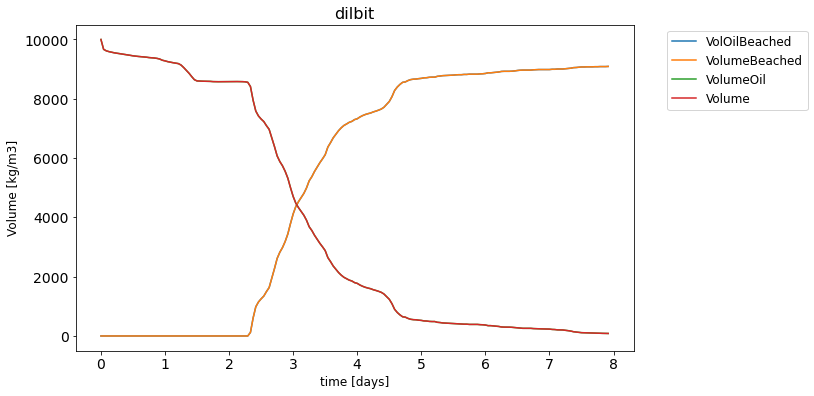

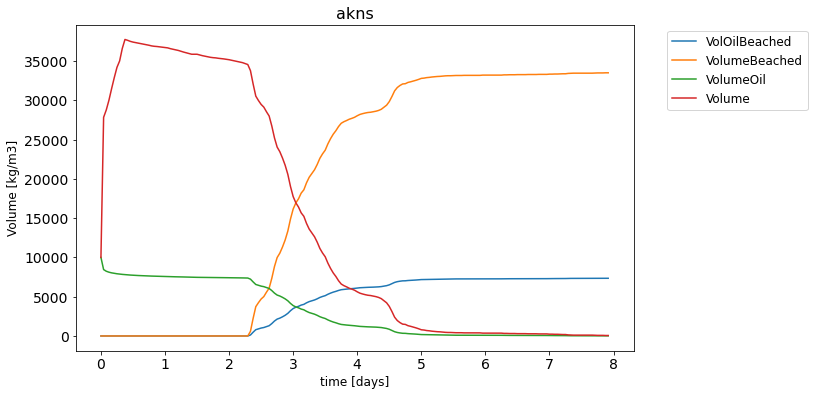

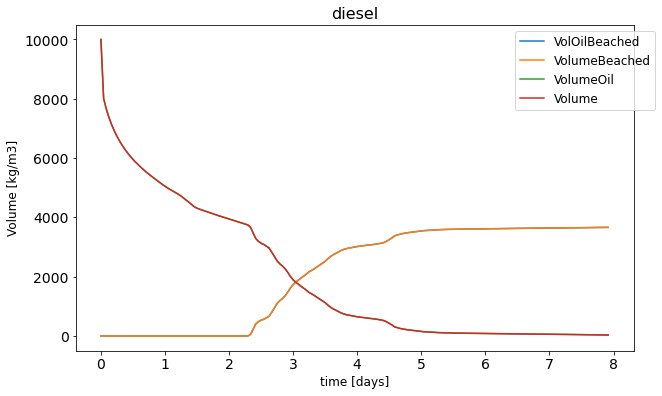

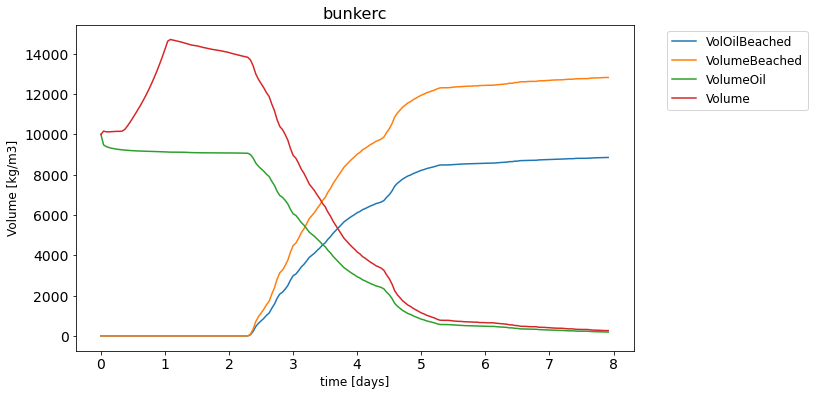

In [8]:
parameters = ['VolOilBeached',
             'VolumeBeached',
             'VolumeOil',
             'Volume'
           ]
for oil in oil_types:
    ax = results[oil][parameters].plot(
        linewidth=1.5,
        #color = [color_dict.get(column_name,'#333333') for oil in oil_types],
        figsize = (10,6),
        fontsize = 14
    )
    ax.set_ylabel('Volume [kg/m3]')
    ax.set_xlabel('time [days]')
    ax.set_title(f'{oil}')
    ax.legend(bbox_to_anchor=(1.05, 1))

### Now I look at density changes over time as another way of evaluating emulsion (i.e. more water brings density closer to that of water)

Question:
- What causes Diesel to become more dense with time? Evaporation? 


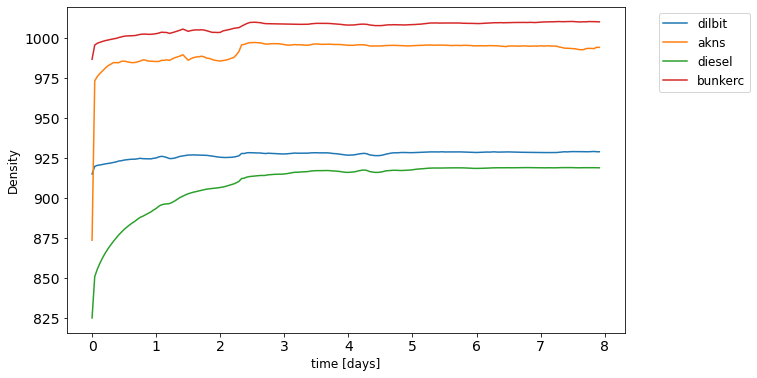

In [9]:
for oil in oil_types:
    ax = results[oil]['Density'].plot(
        linewidth=1.5,
        #color = [color_dict.get(column_name,'#333333') for oil in oil_types],
        figsize = (10,6),
        fontsize = 14,
        label = f'{oil}'
    )
    ax.set_ylabel('Density')
    ax.set_xlabel('time [days]')
    
ax.legend(bbox_to_anchor=(1.05, 1))

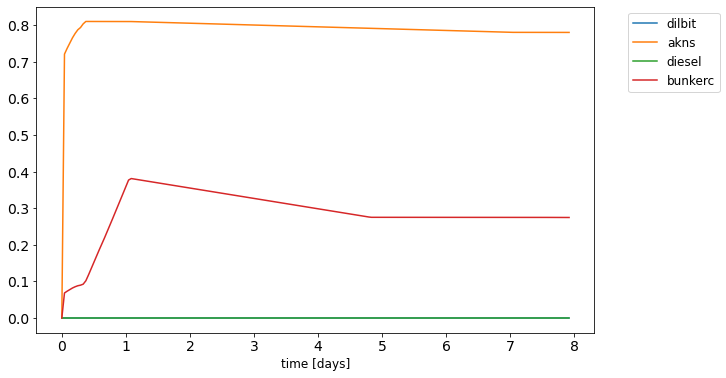

In [10]:
for oil in oil_types:
    ax = results[oil]['MWaterContent'].plot(
        linewidth=1.5,
        #color = [color_dict.get(column_name,'#333333') for oil in oil_types],
        figsize = (10,6),
        fontsize = 14,
        label = f'{oil}'
    )
    #ax.set_ylabel('Density')
    ax.set_xlabel('time [days]')
    
ax.legend(bbox_to_anchor=(1.05, 1))

---
### The code below this point explores two different methods for calculating beaching volume
### The second method is the one that works
### Date not relavent but these results reflect Jan. 15, 2018 spill 
___

/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/midoss_utils.py:37: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pandas.datetime(numpy.int(YY), numpy.int(MM), numpy.int(DD),
/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/midoss_utils.py:65: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pandas.datetime(numpy.int(YY), numpy.int(MM), numpy.int(DD),


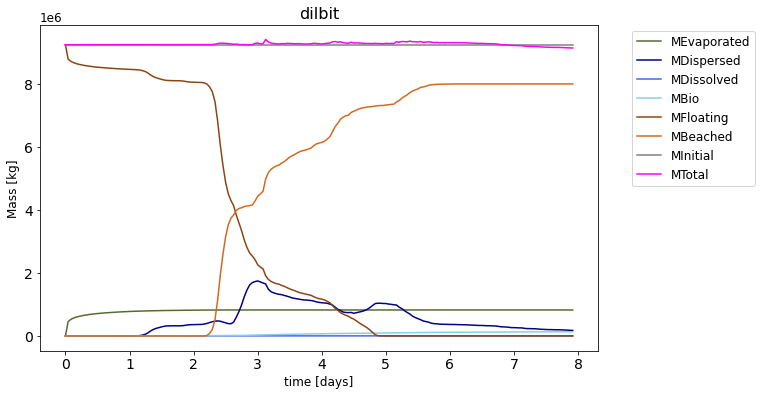

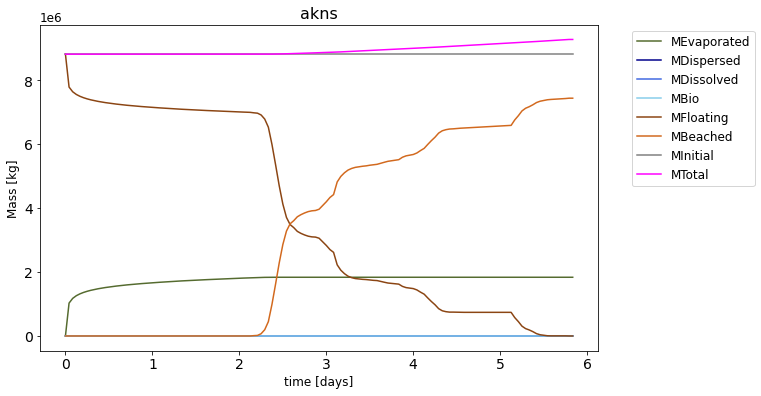

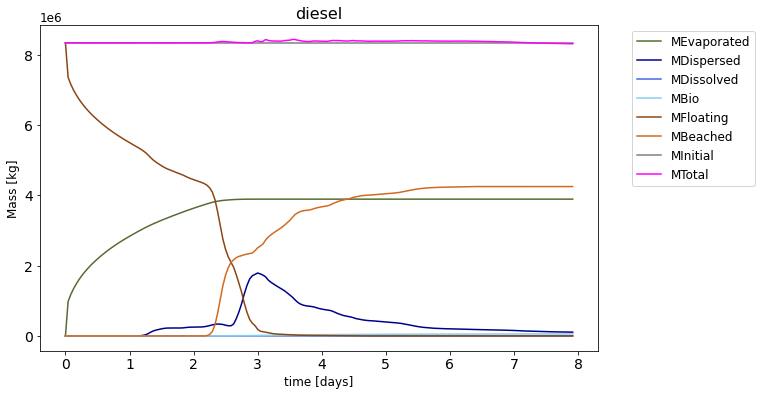

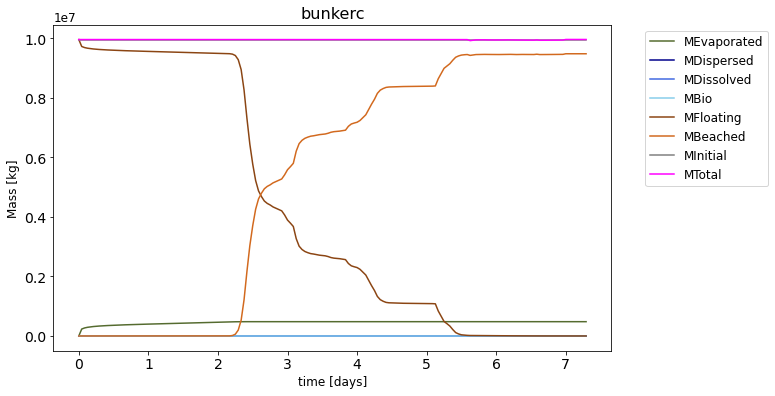

In [11]:
results_path = Path('/Users/rmueller/Projects/MIDOSS/results/EightCases_forHaibo/15jan2018/')
akns_sro = results_path/'resOilOutput_akns.sro'
bunker_sro = results_path/'resOilOutput_bunkerc.sro'
diesel_sro = results_path/'resOilOutput_diesel.sro'
dilbit_sro = results_path/'resOilOutput_dilbit.sro'


color_dict = {"MEvaporated": "darkolivegreen",
              "MDispersed": "darkblue", 
              "MDissolved": "royalblue", 
              "MBio": "skyblue",
              "MFloating": "saddlebrown", 
             "MBeached": "chocolate", 
             "MInitial": "grey",
             "MTotal":"magenta"}

cols_plot = ["MEvaporated", "MDispersed",  "MDissolved", "MBio", "MFloating", "MBeached", "MInitial","MTotal"]
fname = {}
results = {}
for oil in oil_types:
    fname[oil] = results_path/f'resOilOutput_{oil}.sro'
    results[oil] = load_sro(fname[oil],['MEvaporated', 'MDispersed', 'MDissolved','MBio','MassOil','VolumeBeached','Density','VWaterContent','MWaterContent'])
    results[oil] = results[oil].rename(columns={"MassOil":"MFloating"})
    # calculate mass of beached oil (this step will eventually be inherent to the "load_sro" script)
    results[oil]['MBeached'] = [row['VolumeBeached']*row['Density']*(1-row['MWaterContent']) for day, row in results[oil].iterrows()]
    # net mass of weathered oil
    results[oil]['MTotal'] = [row['MEvaporated']+row['MDispersed']+row['MDissolved']+row['MBio']+row['MFloating']+row['MBeached'] for day, row in results[oil].iterrows()]
    #results[oil] = results[oil].drop(['VolOilBeached','Density'], axis=1)
    # Initial spill mass
    spill_volume = 10000 #m3
    initial_density = results[oil]['Density'][0] #kg/m3
    results[oil]['MInitial'] = [spill_volume * initial_density for i in range(len(results[oil].Density))]
    
for oil in oil_types:
    ax = results[oil][cols_plot].plot(
        linewidth=1.5,
        color = [color_dict.get(column_name,'#333333') for column_name in cols_plot],
        figsize = (10,6),
        fontsize = 14
    )
    ax.set_ylabel('Mass [kg]')
    ax.set_xlabel('time [days]')
    ax.set_title(f'{oil}')
    ax.legend(bbox_to_anchor=(1.05, 1))

#### massbeached = (VolOilBeached * oil0d.Density/(1-VWaterContent)*(1-MWaterContent))


/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/midoss_utils.py:37: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pandas.datetime(numpy.int(YY), numpy.int(MM), numpy.int(DD),
/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/midoss_utils.py:65: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pandas.datetime(numpy.int(YY), numpy.int(MM), numpy.int(DD),


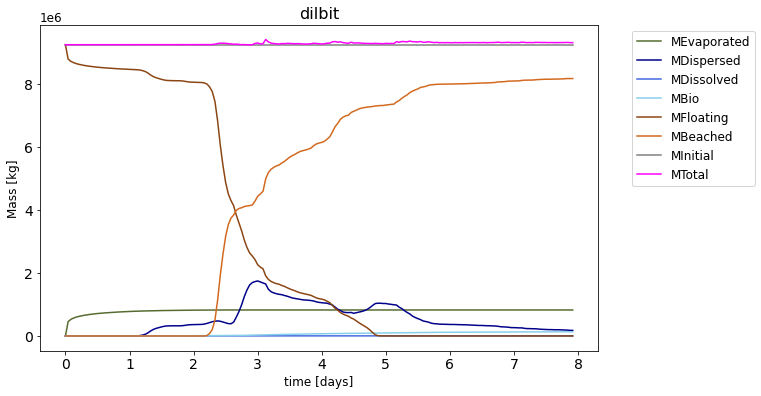

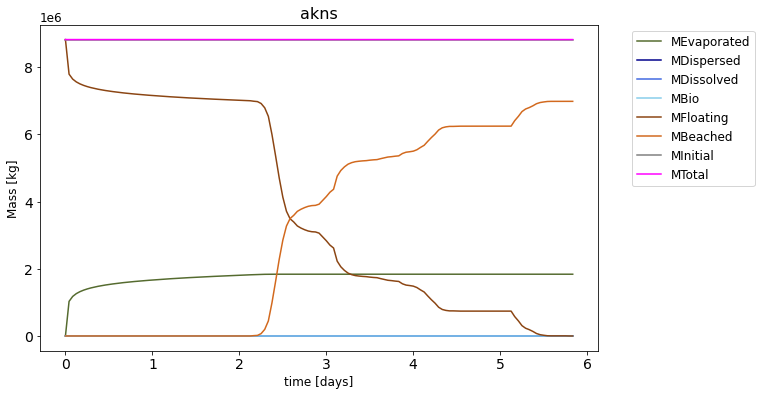

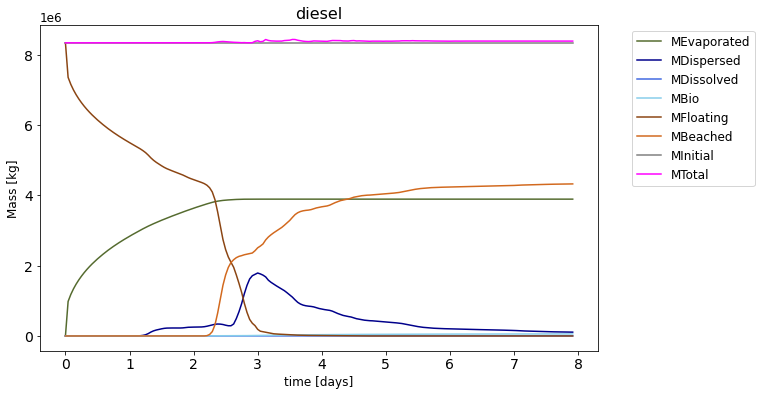

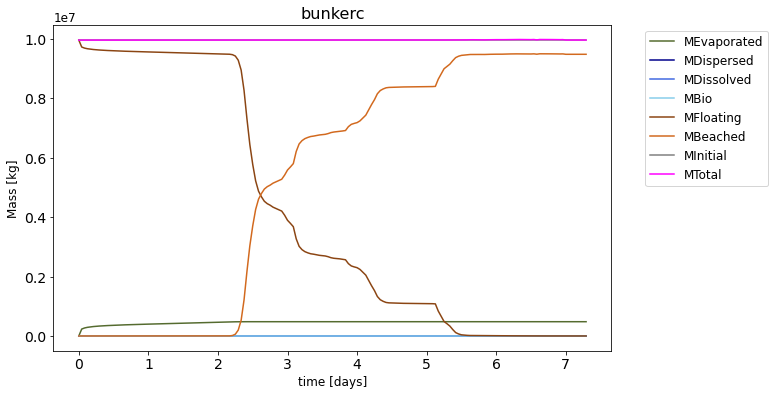

In [12]:
results_path = Path('/Users/rmueller/Projects/MIDOSS/results/EightCases_forHaibo/15jan2018/')
akns_sro = results_path/'resOilOutput_akns.sro'
bunker_sro = results_path/'resOilOutput_bunkerc.sro'
diesel_sro = results_path/'resOilOutput_diesel.sro'
dilbit_sro = results_path/'resOilOutput_dilbit.sro'

fname = {}
results = {}
for oil in oil_types:
    fname[oil] = results_path/f'resOilOutput_{oil}.sro'
    results[oil] = load_sro(fname[oil],['MEvaporated', 'MDispersed', 'MDissolved','MBio','MassOil','VolOilBeached','Density','VWaterContent','MWaterContent'])
    results[oil] = results[oil].rename(columns={"MassOil":"MFloating"})
    # calculate mass of beached oil (this step will eventually be inherent to the "load_sro" script)
    results[oil]['MBeached'] = [row['VolOilBeached']*row['Density']/(1-row['VWaterContent'])*(1-row['MWaterContent']) for day, row in results[oil].iterrows()]
    # net mass of weathered oil
    results[oil]['MTotal'] = [row['MEvaporated']+row['MDispersed']+row['MDissolved']+row['MBio']+row['MFloating']+row['MBeached'] for day, row in results[oil].iterrows()]
    #results[oil] = results[oil].drop(['VolOilBeached','Density'], axis=1)
    # Initial spill mass
    spill_volume = 10000 #m3
    initial_density = results[oil]['Density'][0] #kg/m3
    results[oil]['MInitial'] = [spill_volume * initial_density for i in range(len(results[oil].Density))]
    
for oil in oil_types:
    ax = results[oil][cols_plot].plot(
        linewidth=1.5,
        color = [color_dict.get(column_name,'#333333') for column_name in cols_plot],
        figsize = (10,6),
        fontsize = 14
    )
    ax.set_ylabel('Mass [kg]')
    ax.set_xlabel('time [days]')
    ax.set_title(f'{oil}')
    ax.legend(bbox_to_anchor=(1.05, 1))

/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/midoss_utils.py:37: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pandas.datetime(numpy.int(YY), numpy.int(MM), numpy.int(DD),
/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/midoss_utils.py:65: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pandas.datetime(numpy.int(YY), numpy.int(MM), numpy.int(DD),


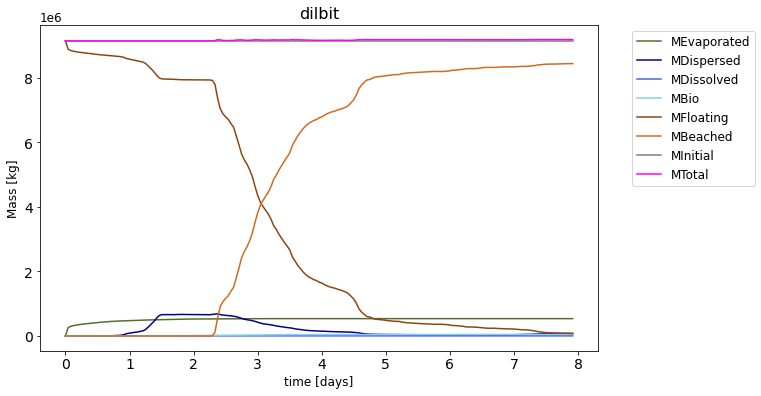

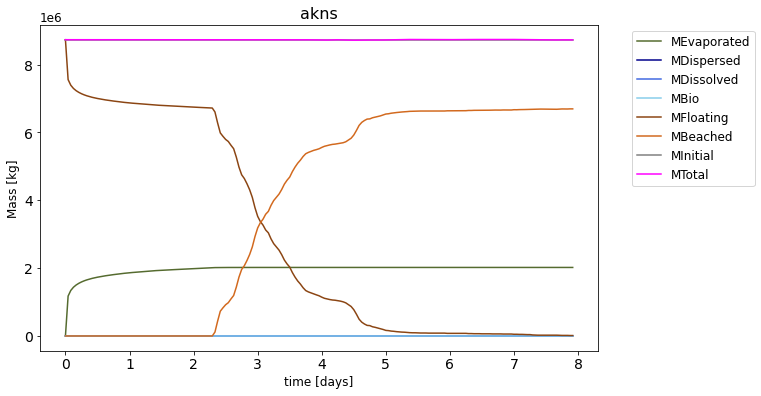

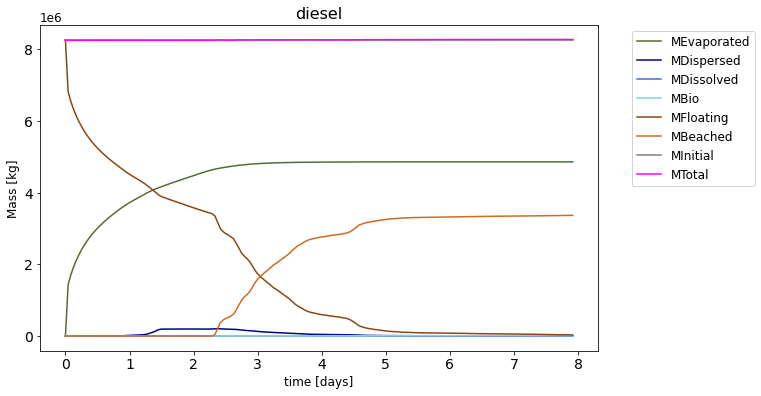

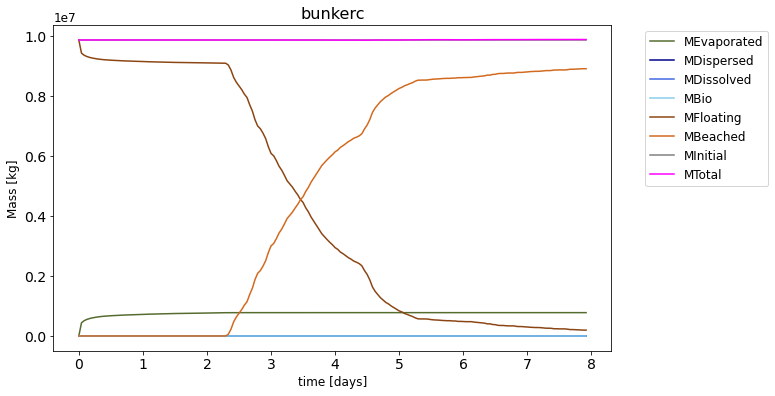

In [13]:
results_path = Path('/Users/rmueller/Projects/MIDOSS/results/EightCases_forHaibo/05jun2015/')
akns_sro = results_path/'resOilOutput_akns.sro'
bunker_sro = results_path/'resOilOutput_bunkerc.sro'
diesel_sro = results_path/'resOilOutput_diesel.sro'
dilbit_sro = results_path/'resOilOutput_dilbit.sro'

fname = {}
results = {}
for oil in oil_types:
    fname[oil] = results_path/f'resOilOutput_{oil}.sro'
    results[oil] = load_sro(fname[oil],['MEvaporated', 'MDispersed', 'MDissolved','MBio','MassOil','VolOilBeached','Density','VWaterContent','MWaterContent'])
    results[oil] = results[oil].rename(columns={"MassOil":"MFloating"})
    # calculate mass of beached oil (this step will eventually be inherent to the "load_sro" script)
    results[oil]['MBeached'] = [row['VolOilBeached']*row['Density']/(1-row['VWaterContent'])*(1-row['MWaterContent']) for day, row in results[oil].iterrows()]
    # net mass of weathered oil
    results[oil]['MTotal'] = [row['MEvaporated']+row['MDispersed']+row['MDissolved']+row['MBio']+row['MFloating']+row['MBeached'] for day, row in results[oil].iterrows()]
    #results[oil] = results[oil].drop(['VolOilBeached','Density'], axis=1)
    # Initial spill mass
    spill_volume = 10000 #m3
    initial_density = results[oil]['Density'][0] #kg/m3
    results[oil]['MInitial'] = [spill_volume * initial_density for i in range(len(results[oil].Density))]
    
for oil in oil_types:
    ax = results[oil][cols_plot].plot(
        linewidth=1.5,
        color = [color_dict.get(column_name,'#333333') for column_name in cols_plot],
        figsize = (10,6),
        fontsize = 14
    )
    ax.set_ylabel('Mass [kg]')
    ax.set_xlabel('time [days]')
    ax.set_title(f'{oil}')
    ax.legend(bbox_to_anchor=(1.05, 1))

#### 
***
ORIGINAL CODE BELOW 
***

#### Plot diesel

In [14]:
# load all the values that we need
mass = load_sro(diesel_sro,['MEvaporated', 'MDispersed', 'MDissolved','MBio','MassOil','VolOilBeached','Density'])
mass = mass.rename(columns={"MassOil":"MFloating"})

/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/midoss_utils.py:37: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pandas.datetime(numpy.int(YY), numpy.int(MM), numpy.int(DD),
/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/midoss_utils.py:65: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pandas.datetime(numpy.int(YY), numpy.int(MM), numpy.int(DD),


In [15]:
# create a vector of values with initial spill mass
spill_volume = 10000 #m3
initial_density = mass.Density[0] #kg/m3
mass['MInitial'] = [spill_volume * initial_density for i in range(len(mass.Density))]

# calculate mass of beached oil (this step will eventually be inherent to the "load_sro" script)
mass['MBeached'] = [row['VolOilBeached']*row['Density'] for day, row in mass.iterrows()]

# net mass of weathered oil
mass['MTotal'] = [row['MEvaporated']+row['MDispersed']+row['MDissolved']+row['MBio']+row['MFloating']+row['MBeached'] for day, row in mass.iterrows()]

In [16]:
mass = mass.drop(['VolOilBeached','Density'], axis=1)

mass[:0]

,MEvaporated,MDispersed,MDissolved,MBio,MFloating,datetime,MInitial,MBeached,MTotal
days_since_spill,,,,,,,,,
0.0,0.0,0.0,0.0,0.0,8.250500e+06,2015-06-05 00:30:00,8.250500e+06,0.0,8.250500e+06


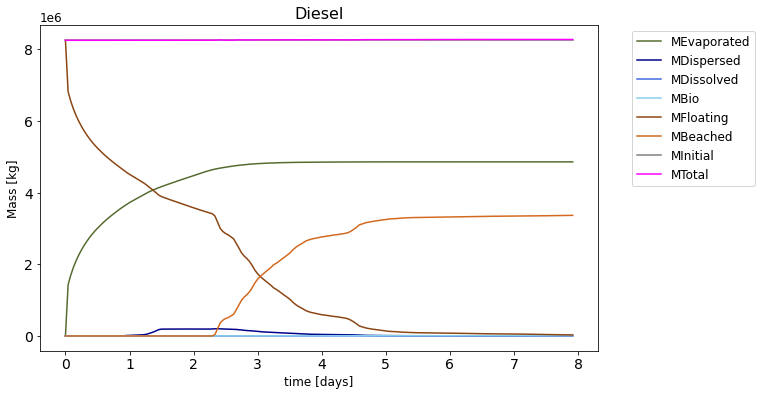

In [17]:
color_dict = {"MEvaporated": "darkolivegreen",
              "MDispersed": "darkblue", 
              "MDissolved": "royalblue", 
              "MBio": "skyblue",
              "MFloating": "saddlebrown", 
             "MBeached": "chocolate", 
             "MInitial": "grey",
             "MTotal":"magenta"}

cols_plot = ["MEvaporated", "MDispersed",  "MDissolved", "MBio", "MFloating", "MBeached", "MInitial","MTotal"]

ax = mass[cols_plot].plot(
    linewidth=1.5,
    color = [color_dict.get(column_name,'#333333') for column_name in cols_plot],
    figsize = (10,6),
    fontsize = 14
)
ax.set_ylabel('Mass [kg]')
ax.set_xlabel('time [days]')
ax.set_title('Diesel')
ax.legend(bbox_to_anchor=(1.05, 1))

#### Plot Dilbit

/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/midoss_utils.py:37: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pandas.datetime(numpy.int(YY), numpy.int(MM), numpy.int(DD),
/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/midoss_utils.py:65: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pandas.datetime(numpy.int(YY), numpy.int(MM), numpy.int(DD),


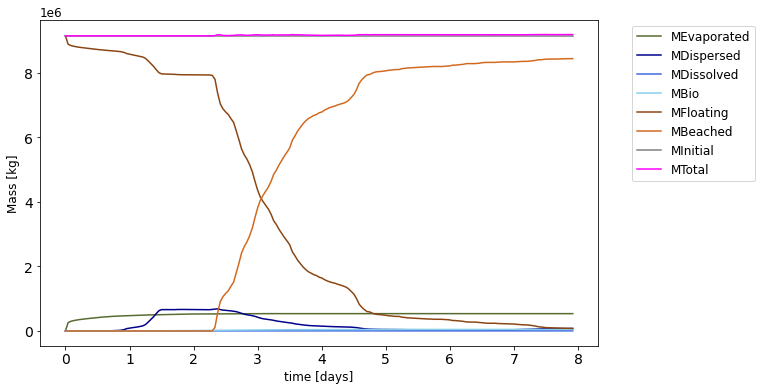

In [18]:
# load all the values that we need
mass = load_sro(dilbit_sro,['MEvaporated', 'MDispersed', 'MDissolved','MBio','MassOil','VolOilBeached','Density'])
mass = mass.rename(columns={"MassOil":"MFloating"})

# create a vector of values with initial spill mass
spill_volume = 10000 #m3
initial_density = mass.Density[0] #kg/m3
mass['MInitial'] = [spill_volume * initial_density for i in range(len(mass.Density))]

# calculate mass of beached oil (this step will eventually be inherent to the "load_sro" script)
mass['MBeached'] = [row['VolOilBeached']*row['Density'] for day, row in mass.iterrows()]

# net mass of weathered oil
mass['MTotal'] = [row['MEvaporated']+row['MDispersed']+row['MDissolved']+row['MBio']+row['MFloating']+row['MBeached'] for day, row in mass.iterrows()]

mass = mass.drop(['VolOilBeached','Density'], axis=1)

mass[:0]

color_dict = {"MEvaporated": "darkolivegreen",
              "MDispersed": "darkblue", 
              "MDissolved": "royalblue", 
              "MBio": "skyblue",
              "MFloating": "saddlebrown", 
             "MBeached": "chocolate", 
             "MInitial": "grey",
             "MTotal":"magenta"}

cols_plot = ["MEvaporated", "MDispersed",  "MDissolved", "MBio", "MFloating", "MBeached", "MInitial","MTotal"]

ax = mass[cols_plot].plot(
    linewidth=1.5,
    color = [color_dict.get(column_name,'#333333') for column_name in cols_plot],
    figsize = (10,6),
    fontsize = 14
)
ax.set_ylabel('Mass [kg]')
ax.set_xlabel('time [days]')
ax.legend(bbox_to_anchor=(1.05, 1))


#### Plot AKNS

/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/midoss_utils.py:37: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pandas.datetime(numpy.int(YY), numpy.int(MM), numpy.int(DD),
/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/midoss_utils.py:65: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pandas.datetime(numpy.int(YY), numpy.int(MM), numpy.int(DD),


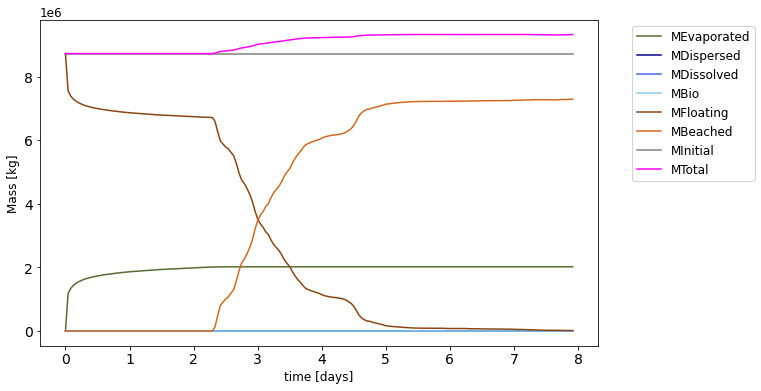

In [19]:
# load all the values that we need
mass = load_sro(akns_sro,['MEvaporated', 'MDispersed', 'MDissolved','MBio','MassOil','VolOilBeached','Density'])
mass = mass.rename(columns={"MassOil":"MFloating"})

# create a vector of values with initial spill mass
spill_volume = 10000 #m3
initial_density = mass.Density[0] #kg/m3
mass['MInitial'] = [spill_volume * initial_density for i in range(len(mass.Density))]

# calculate mass of beached oil (this step will eventually be inherent to the "load_sro" script)
mass['MBeached'] = [row['VolOilBeached']*row['Density'] for day, row in mass.iterrows()]

# net mass of weathered oil
mass['MTotal'] = [row['MEvaporated']+row['MDispersed']+row['MDissolved']+row['MBio']+row['MFloating']+row['MBeached'] for day, row in mass.iterrows()]

mass = mass.drop(['VolOilBeached','Density'], axis=1)

mass[:0]

color_dict = {"MEvaporated": "darkolivegreen",
              "MDispersed": "darkblue", 
              "MDissolved": "royalblue", 
              "MBio": "skyblue",
              "MFloating": "saddlebrown", 
             "MBeached": "chocolate", 
             "MInitial": "grey",
             "MTotal":"magenta"}

cols_plot = ["MEvaporated", "MDispersed",  "MDissolved", "MBio", "MFloating", "MBeached", "MInitial","MTotal"]

ax = mass[cols_plot].plot(
    linewidth=1.5,
    color = [color_dict.get(column_name,'#333333') for column_name in cols_plot],
    figsize = (10,6),
    fontsize = 14
)
ax.set_ylabel('Mass [kg]')
ax.set_xlabel('time [days]')
ax.legend(bbox_to_anchor=(1.05, 1))

### bunkerc

/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/midoss_utils.py:37: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pandas.datetime(numpy.int(YY), numpy.int(MM), numpy.int(DD),
/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/midoss_utils.py:65: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pandas.datetime(numpy.int(YY), numpy.int(MM), numpy.int(DD),


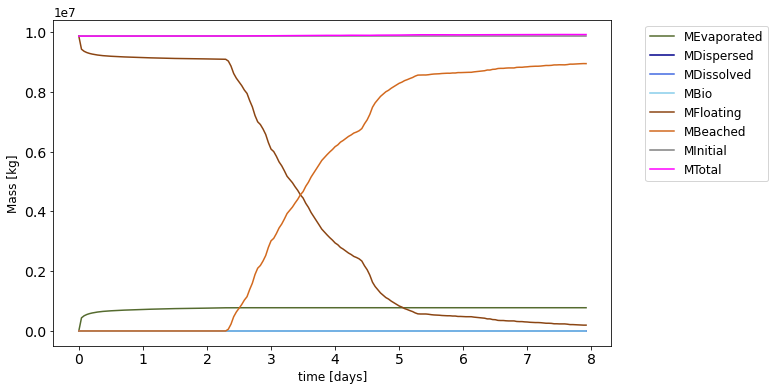

In [20]:
# load all the values that we need
mass = load_sro(bunker_sro,['MEvaporated', 'MDispersed', 'MDissolved','MBio','MassOil','VolOilBeached','Density'])
mass = mass.rename(columns={"MassOil":"MFloating"})

# create a vector of values with initial spill mass
spill_volume = 10000 #m3
initial_density = mass.Density[0] #kg/m3
mass['MInitial'] = [spill_volume * initial_density for i in range(len(mass.Density))]

# calculate mass of beached oil (this step will eventually be inherent to the "load_sro" script)
mass['MBeached'] = [row['VolOilBeached']*row['Density'] for day, row in mass.iterrows()]

# net mass of weathered oil
mass['MTotal'] = [row['MEvaporated']+row['MDispersed']+row['MDissolved']+row['MBio']+row['MFloating']+row['MBeached'] for day, row in mass.iterrows()]

mass = mass.drop(['VolOilBeached','Density'], axis=1)

mass[:0]

color_dict = {"MEvaporated": "darkolivegreen",
              "MDispersed": "darkblue", 
              "MDissolved": "royalblue", 
              "MBio": "skyblue",
              "MFloating": "saddlebrown", 
             "MBeached": "chocolate", 
             "MInitial": "grey",
             "MTotal":"magenta"}

cols_plot = ["MEvaporated", "MDispersed",  "MDissolved", "MBio", "MFloating", "MBeached", "MInitial","MTotal"]

ax = mass[cols_plot].plot(
    linewidth=1.5,
    color = [color_dict.get(column_name,'#333333') for column_name in cols_plot],
    figsize = (10,6),
    fontsize = 14
)
ax.set_ylabel('Mass [kg]')
ax.set_xlabel('time [days]')
ax.legend(bbox_to_anchor=(1.05, 1))